In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
mydata = datasets.load_iris()
mydata.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [2]:
X = mydata.data
y = mydata.target

为了可视化, 所以只取前两类样本，且只取前两类特征。

In [3]:
X = X[y < 2,:2]
X.shape

(100, 2)

In [4]:
y = y[y < 2]
y.shape

(100,)

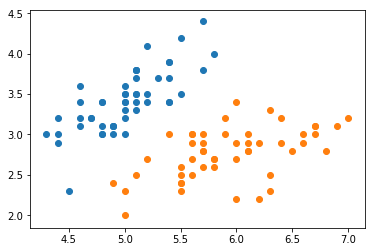

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

对数据进行标准化

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
stand_X = scaler.transform(X)

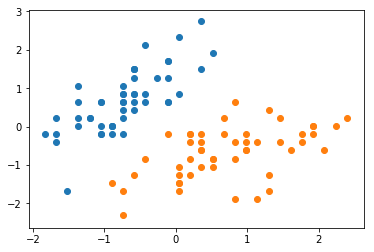

In [7]:
plt.scatter(stand_X[y == 0, 0], stand_X[y == 0, 1])
plt.scatter(stand_X[y == 1, 0], stand_X[y == 1, 1])
plt.show()

1.1 用SVM对数据进行分类，由于我们的目的是可视化分类的决策边界以及margin，不对数据进行预测,故，不再将数据分为测试和训练数据集      
载入sklearn.svm.LinearSVC(support vector classification) 进行分类    
令 C = 1e9 即接近与hard-margin SVM

In [8]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1e9)  # C 越大，正则化的程度越低，越接近与 hard-margin SVM
clf.fit(stand_X, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

note:    
multi_class='ovr', 指在进行多分类时， 采用的是“OVR”方式。可见LinearSVC是直接支持多分类问题的。    
penalty='l2' 是指L2正则

In [9]:
clf.coef_

array([[ 4.03241529, -2.49297058]])

由于我们只选取了2个特征，故系数（权重）就有两个    
再看,clf.coef_ 返回的是我二维的数组,是因为，如果要分为多类的话，后边还有其他决策边界的系数。

In [10]:
clf.intercept_   # 截据

array([0.95367958])

1.2 决策边界的绘制

In [11]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)
    

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


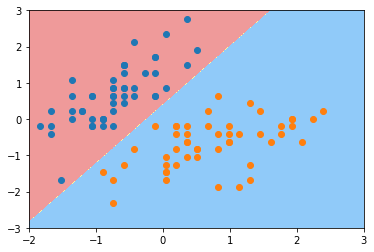

In [12]:
plot_decision_boundary(clf, axis = [-2, 3, -3, 3])
plt.scatter(stand_X[y == 0, 0], stand_X[y == 0, 1])
plt.scatter(stand_X[y == 1, 0], stand_X[y == 1, 1])
plt.show()

1.3 绘制margin

In [13]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


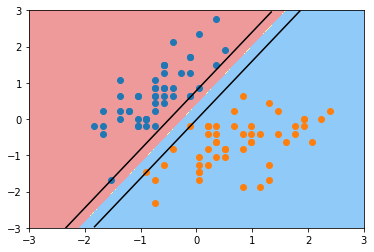

In [14]:
plot_svc_decision_boundary(clf, axis = [-3, 3, -3, 3])
plt.scatter(stand_X[y == 0, 0], stand_X[y == 0, 1])
plt.scatter(stand_X[y == 1, 0], stand_X[y == 1, 1])
plt.show()

2.1 令C = 0.01 即为 Soft-margin SVM

In [15]:
clf2 = LinearSVC(C = 0.1)
clf2.fit(stand_X, y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
clf2.coef_

array([[ 0.90283166, -0.74145406]])

In [17]:
clf2.intercept_

array([0.09386857])

2.2 绘制决策边界 和margin

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


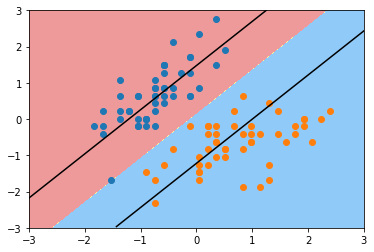

In [19]:
plot_svc_decision_boundary(clf2, axis = [-3, 3, -3, 3])
plt.scatter(stand_X[y == 0, 0], stand_X[y == 0, 1])
plt.scatter(stand_X[y == 1, 0], stand_X[y == 1, 1])
plt.show()

由上图可以看书，margin 太大了，也就是说 C 太小了，C 应该大一点，使得分类更严格一点。